In [ ]:
# Ashish Tikariha
# ashishtikaria5@gmail.com

#### INTRODUCTION

* Concrete surface cracks are major defect in civil infra-structures. Building Inspection is done for the evaluation of rigidity and strength of the building and Crack detection plays a major role in the building inspection, finding the cracks and determining the building health.

#### DATASET

* The datasets contains images of various concrete surfaces with and without crack. The image data are divided into two as negative (without crack) and positive (with crack) in separate folder for image classification. Each class has 20000images with a total of 40000 images with 227 x 227 pixels with RGB channels. The dataset is generated from 458 high-resolution images (4032x3024 pixel) with the method proposed by Zhang et al (2016). High resolution images found out to have high variance in terms of surface finish and illumination condition. No data augmentation in terms of random rotation or flipping or tilting can be applied to them.

#### Source of Dataset

* This dataset is taken from the website Mendeley Data - Crack Detection, contributed by Çağlar Fırat Özgenel.

* Özgenel, Çağlar Fırat (2019), “Concrete Crack Images for Classification”, Mendeley Data, v2
http://dx.doi.org/10.17632/5y9wdsg2zt.2

#### Summary

CNN model is built to classify the images into crack positive and crack negative images.The accucracy of model is 98.6% on test dataset, which is a pretty good number. The model is almost perfect in classifying the images.


In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
import os.path
from pathlib import Path

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D , MaxPool2D  , Flatten , Dense , Dropout
from tensorflow.keras.models import Sequential

In [2]:
# Changing directory
!cd /content/drive/MyDrive/Crack_data        

In [3]:
#Get Positive & Negative Directories
positive_dir = Path('/content/drive/MyDrive/Crack_data/Positive')
negative_dir = Path('/content/drive/MyDrive/Crack_data/Negative')

In [4]:
#Crack Image Count
crack_images = len(list(positive_dir.glob(r'*.jpg')))
print("Number of Crack Images: ",crack_images)

Number of Crack Images:  20000


In [ ]:
#No Crack Image Count
no_crack_images =len(list(negative_dir.glob(r'*.jpg')))
print("Number of No Crack Images: ",no_crack_images)

Number of No Crack Images:  20000


In [5]:
# Dynamic parameters
data_path='/content/drive/MyDrive/Crack_data'
Img_size=128
Batch_size=32
Channels = 3

In [8]:
# Creating a dataset from image files in directory

dataset = tf.keras.preprocessing.image_dataset_from_directory(data_path,
                                       image_size=(Img_size,Img_size),
                                       batch_size=Batch_size,
                                      shuffle=True)

Found 40000 files belonging to 2 classes.


In [9]:
# getting all the class_names

class_names = dataset.class_names
class_names

['Negative', 'Positive']

In [11]:
# One batch consists of 32 RGB images with 128*128 pixels
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)

(32, 128, 128, 3)


In [ ]:
# Categories of image in batch 
# 0 ---> Negative
# 1 ---> Positive
print(label_batch.numpy)

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int32)>>


## Visualization

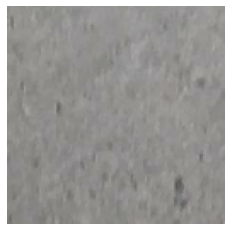

In [ ]:
for image_batch, label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype('uint8'))
  plt.axis('off')

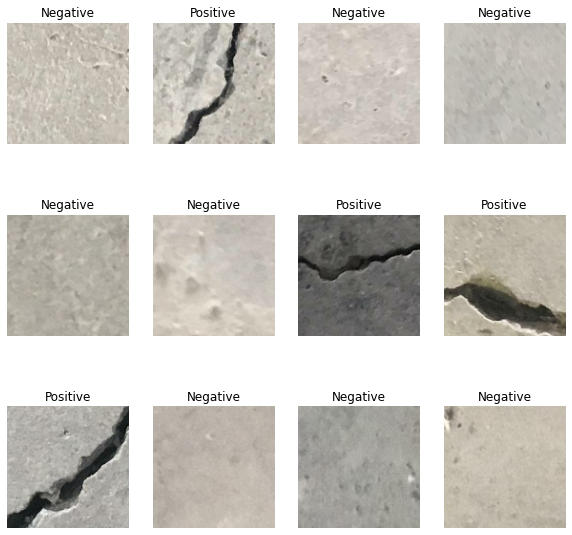

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')

# Train_Test_Split

### 80% ----> Training
### 20% ----> Testing
### 50% of Testing --->  Test_ds
### 50% of Testing --->  validation_ds

In [ ]:
len(dataset)

1250

In [12]:
train_size=0.8
len(dataset)*train_size

1000.0

In [13]:
train_ds=dataset.take(1000)
len(train_ds)

1000

In [14]:
testing_ds=dataset.skip(1000)
len(testing_ds)

250

In [15]:
test_ds=testing_ds.take(125)
print(len(test_ds))
validation_ds=testing_ds.skip(125)
print(len(validation_ds))

125
125


# Steps in model building

### 1 architecture
### 2 compilation
### 3 fit

# Model_Architecture


In [ ]:
input=layers.Input(shape=(128,128,3))
x=layers.Conv2D(16,3,activation="relu")(input)
x=layers.MaxPool2D((2,2))(x)

x=layers.Conv2D(32,3,activation="relu")(x)
x=layers.MaxPool2D((2,2))(x)
x=layers.GlobalAveragePooling2D()(x)

output=layers.Dense(1,activation="sigmoid")(x)

model=tf.keras.Model(input,output)

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33  

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint= ModelCheckpoint('best_model.h5',monitor='loss',save_best_only=True)

In [ ]:
history=model.fit(train_ds,batch_size = Batch_size, epochs = 10,validation_data=validation_ds,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                              patience=3,
                                                              restore_best_weights=True),checkpoint])

model.save('Crack_detection1.h5')

Epoch 1/10
1000/1000 [==============================] - 134s 133ms/step - loss: 0.2896 - accuracy: 0.9427 - val_loss: 0.0785 - val_accuracy: 0.9818
Epoch 2/10
1000/1000 [==============================] - 133s 133ms/step - loss: 0.0930 - accuracy: 0.9726 - val_loss: 0.0739 - val_accuracy: 0.9715
Epoch 3/10
1000/1000 [==============================] - 133s 133ms/step - loss: 0.0766 - accuracy: 0.9765 - val_loss: 0.0620 - val_accuracy: 0.9852
Epoch 4/10
1000/1000 [==============================] - 133s 133ms/step - loss: 0.1044 - accuracy: 0.9679 - val_loss: 0.0439 - val_accuracy: 0.9883
Epoch 5/10
1000/1000 [==============================] - 134s 133ms/step - loss: 0.0719 - accuracy: 0.9791 - val_loss: 0.0442 - val_accuracy: 0.9898
Epoch 6/10
1000/1000 [==============================] - 133s 133ms/step - loss: 0.0610 - accuracy: 0.9825 - val_loss: 0.0488 - val_accuracy: 0.9902
Epoch 7/10
1000/1000 [==============================] - 133s 133ms/step - loss: 0.0607 - accuracy: 0.9838 - val_

In [ ]:
model.save('Crack_detection1.h5')

In [ ]:
model.evaluate(test_ds)

125/125 [==============================] - 59s 62ms/step - loss: 0.0472 - accuracy: 0.9860


[0.04723789915442467, 0.9860000014305115]

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

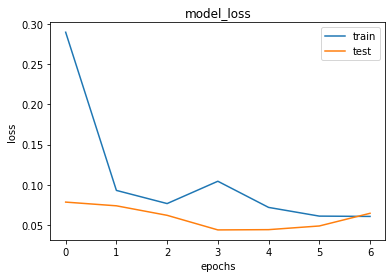

In [ ]:
# Visualising the losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'])

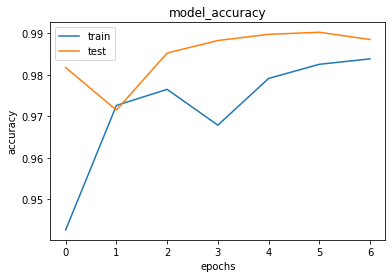

In [ ]:
# visualising the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'])